# Anusha Training Classifiers

This code is to train a classifier from the stats_df dataframe generated from notebook 2.

In [31]:
# basics
import numpy as np
import pandas as pd

# models
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint

# visualization
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


In [3]:
stats_df_file_path = '/Genomics/argo/users/aa8417/anusha_kpms_trial/anusha_kpms_project/gpu_1e5_all_data/stats_df.csv'
df = pd.read_csv(stats_df_file_path)
df

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration
0,default,Trial2_UlqC1_060_analysis_track0,0,-0.008429,1.707789,-3.137059,3.139218,0.148907,11.560515,-187.917112,188.230607,94.251245,71.720089,0.517417,1976.642454,0.083743,0.219208
1,default,Trial2_UlqC1_060_analysis_track0,1,0.142729,1.897415,-3.139974,3.137366,-0.221078,12.703561,-188.014395,187.534699,108.397981,73.418969,0.605706,441.110550,0.079691,0.145506
2,default,Trial2_UlqC1_060_analysis_track0,2,0.304362,1.790477,-3.133213,3.141183,0.044329,11.490532,-187.590005,187.462314,120.648347,89.161624,0.419368,1008.156427,0.068271,0.127758
3,default,Trial2_UlqC1_060_analysis_track0,3,0.053973,1.889395,-3.140425,3.136445,-0.114765,12.951170,-188.261123,4.661462,91.688484,58.984816,0.936674,387.419209,0.069499,0.198233
4,default,Trial2_UlqC1_060_analysis_track0,4,-0.094562,1.818180,-3.140668,3.140949,-0.004377,6.732633,-188.220655,188.016878,80.146921,53.929470,0.773517,369.366468,0.080305,0.397401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,default,Trial4_UlqC1_060_analysis_track9,25,0.302684,1.534039,-3.091127,2.785993,-0.001829,0.432861,-3.337498,3.472150,30.567050,16.848049,0.861679,120.729481,0.014354,0.958333
1437,default,Trial4_UlqC1_060_analysis_track9,26,0.383951,1.655801,-2.225178,2.015719,0.098795,0.411537,-1.341715,1.199417,55.899668,46.042975,3.320983,241.466897,0.003589,0.213889
1438,default,Trial4_UlqC1_060_analysis_track9,27,0.978366,2.419350,-3.141516,3.141469,0.062308,16.234101,-188.487233,188.481936,24.906468,13.411451,0.503953,96.866982,0.011364,2.719298
1439,default,Trial4_UlqC1_060_analysis_track9,28,0.762874,1.194861,-2.931854,3.077776,0.004094,0.430078,-3.825036,6.842309,30.231792,16.729645,0.547180,116.638160,0.018242,1.203279


In [4]:
df

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration
0,default,Trial2_UlqC1_060_analysis_track0,0,-0.008429,1.707789,-3.137059,3.139218,0.148907,11.560515,-187.917112,188.230607,94.251245,71.720089,0.517417,1976.642454,0.083743,0.219208
1,default,Trial2_UlqC1_060_analysis_track0,1,0.142729,1.897415,-3.139974,3.137366,-0.221078,12.703561,-188.014395,187.534699,108.397981,73.418969,0.605706,441.110550,0.079691,0.145506
2,default,Trial2_UlqC1_060_analysis_track0,2,0.304362,1.790477,-3.133213,3.141183,0.044329,11.490532,-187.590005,187.462314,120.648347,89.161624,0.419368,1008.156427,0.068271,0.127758
3,default,Trial2_UlqC1_060_analysis_track0,3,0.053973,1.889395,-3.140425,3.136445,-0.114765,12.951170,-188.261123,4.661462,91.688484,58.984816,0.936674,387.419209,0.069499,0.198233
4,default,Trial2_UlqC1_060_analysis_track0,4,-0.094562,1.818180,-3.140668,3.140949,-0.004377,6.732633,-188.220655,188.016878,80.146921,53.929470,0.773517,369.366468,0.080305,0.397401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,default,Trial4_UlqC1_060_analysis_track9,25,0.302684,1.534039,-3.091127,2.785993,-0.001829,0.432861,-3.337498,3.472150,30.567050,16.848049,0.861679,120.729481,0.014354,0.958333
1437,default,Trial4_UlqC1_060_analysis_track9,26,0.383951,1.655801,-2.225178,2.015719,0.098795,0.411537,-1.341715,1.199417,55.899668,46.042975,3.320983,241.466897,0.003589,0.213889
1438,default,Trial4_UlqC1_060_analysis_track9,27,0.978366,2.419350,-3.141516,3.141469,0.062308,16.234101,-188.487233,188.481936,24.906468,13.411451,0.503953,96.866982,0.011364,2.719298
1439,default,Trial4_UlqC1_060_analysis_track9,28,0.762874,1.194861,-2.931854,3.077776,0.004094,0.430078,-3.825036,6.842309,30.231792,16.729645,0.547180,116.638160,0.018242,1.203279


In [14]:
# drop any rows that have NA values
df = df.dropna()

# drop any columns that are unnecessary for model training & remove labels to prevent bias
columns_to_drop = ['group', 'name', 'syllable']
data = df.drop(columns=columns_to_drop)

# get labels
labels = df['syllable']

In [15]:
data

,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration
0,-0.008429,1.707789,-3.137059,3.139218,0.148907,11.560515,-187.917112,188.230607,94.251245,71.720089,0.517417,1976.642454,0.083743,0.219208
1,0.142729,1.897415,-3.139974,3.137366,-0.221078,12.703561,-188.014395,187.534699,108.397981,73.418969,0.605706,441.110550,0.079691,0.145506
2,0.304362,1.790477,-3.133213,3.141183,0.044329,11.490532,-187.590005,187.462314,120.648347,89.161624,0.419368,1008.156427,0.068271,0.127758
3,0.053973,1.889395,-3.140425,3.136445,-0.114765,12.951170,-188.261123,4.661462,91.688484,58.984816,0.936674,387.419209,0.069499,0.198233
4,-0.094562,1.818180,-3.140668,3.140949,-0.004377,6.732633,-188.220655,188.016878,80.146921,53.929470,0.773517,369.366468,0.080305,0.397401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,0.302684,1.534039,-3.091127,2.785993,-0.001829,0.432861,-3.337498,3.472150,30.567050,16.848049,0.861679,120.729481,0.014354,0.958333
1437,0.383951,1.655801,-2.225178,2.015719,0.098795,0.411537,-1.341715,1.199417,55.899668,46.042975,3.320983,241.466897,0.003589,0.213889
1438,0.978366,2.419350,-3.141516,3.141469,0.062308,16.234101,-188.487233,188.481936,24.906468,13.411451,0.503953,96.866982,0.011364,2.719298
1439,0.762874,1.194861,-2.931854,3.077776,0.004094,0.430078,-3.825036,6.842309,30.231792,16.729645,0.547180,116.638160,0.018242,1.203279


In [16]:
labels

0        0
1        1
2        2
3        3
4        4
        ..
1436    25
1437    26
1438    27
1439    28
1440    29
Name: syllable, Length: 1441, dtype: int64

In [18]:
# split data to 70% training and 30% testing
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.30, random_state=42)

In [20]:
# create instance of random forest model and fit the training dataset
rf = RandomForestClassifier()
rf.fit(data_train, labels_train)

RandomForestClassifier()

In [21]:
# predict labels from trained model
labels_pred = rf.predict(data_test)

In [26]:
# get accuracy score
accuracy = accuracy_score(labels_test, labels_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7182448036951501


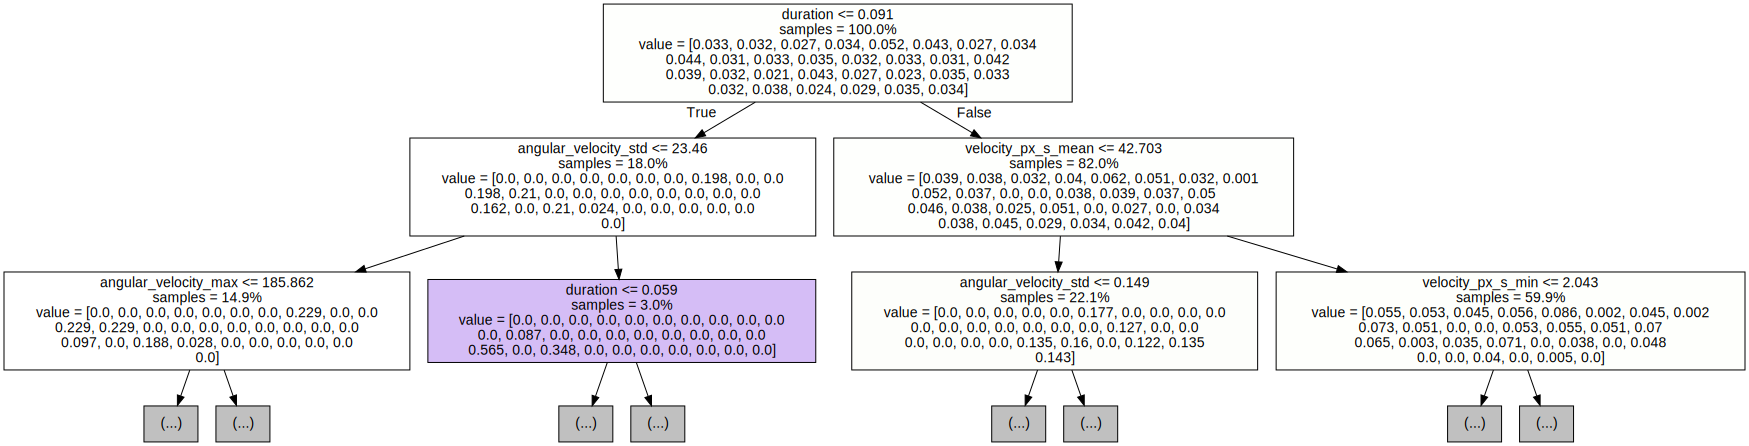

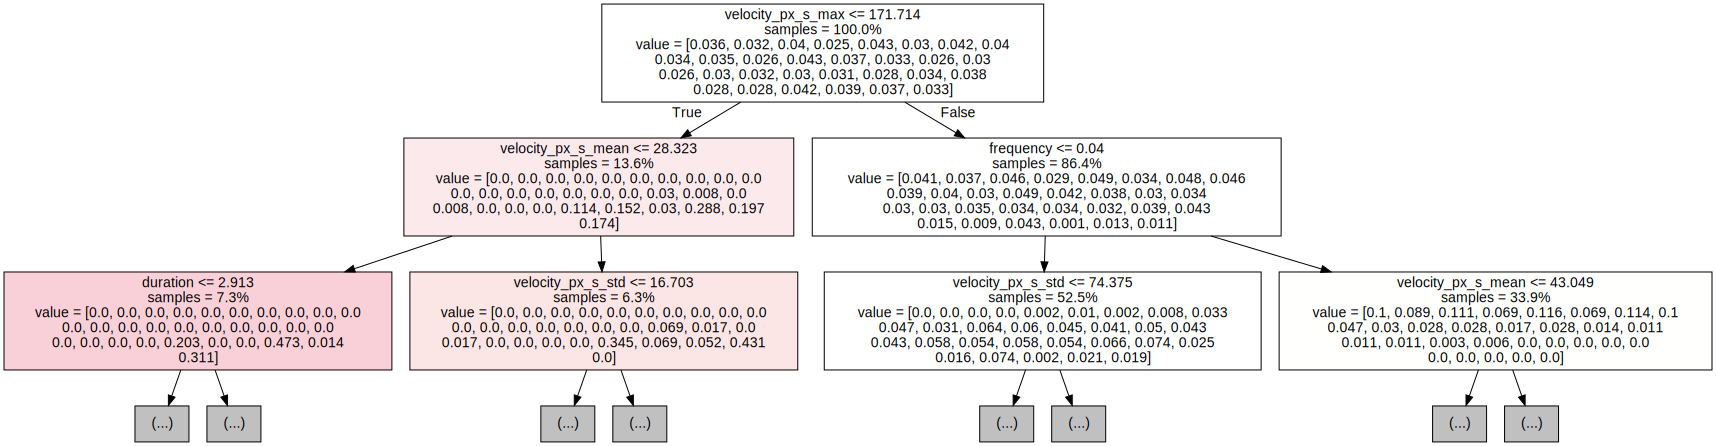

In [30]:
for i in range(2):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=data_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [32]:
# hyperparameter tuning

# parameter values to test out
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# create a random forest classifier
rf = RandomForestClassifier()

# use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# fit the random search object to the data
rand_search.fit(data_train, labels_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f8a85e76220>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f8a85e96eb0>})

In [33]:
# create a variable for the best model
best_rf = rand_search.best_estimator_

# print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 280}


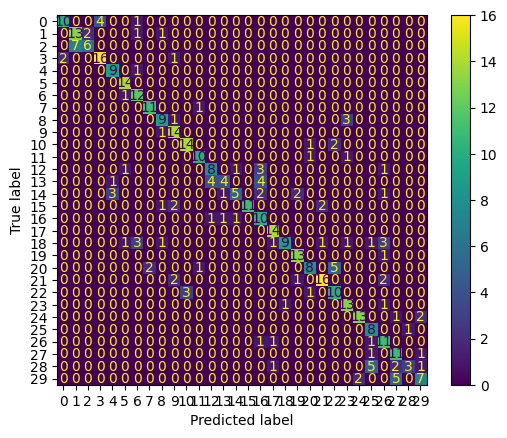

In [34]:
# generate predictions with the best model
labels_pred = best_rf.predict(data_test)

# create the confusion matrix
cm = confusion_matrix(labels_test, labels_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [38]:
accuracy = accuracy_score(labels_test, labels_pred)
precision = precision_score(labels_test, labels_pred, average='weighted')
recall = recall_score(labels_test, labels_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7205542725173211
Precision: 0.7407638326419027
Recall: 0.7205542725173211


<Axes: >

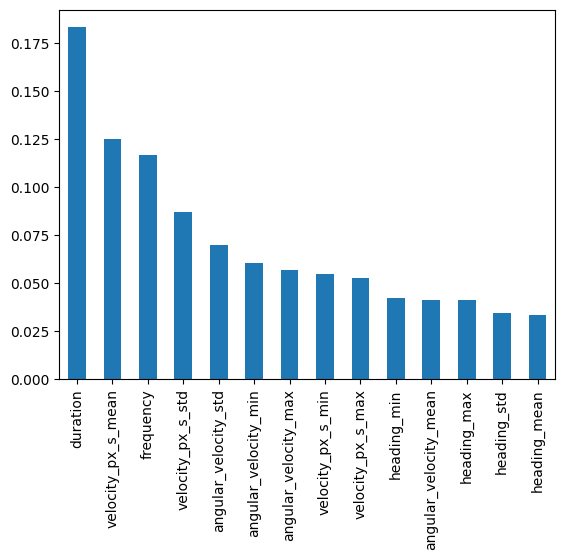

In [39]:
# create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=data_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()